<a href="https://colab.research.google.com/github/venkisamarth/Machine-Learning-/blob/main/decision_tree_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
factory = pd.read_csv('Factory_Salary.csv')
factory.head()

,Date,Profession,Rank,Equipment,Insalubrity,Size_Production,Salary
0,2009-01-01,Metal heater,7,Heating furnaces,22,580,26020.0
1,2009-01-01,Metal heater,6,Heating furnaces,22,580,22980.0
2,2009-01-01,Metal heater,5,Heating furnaces,22,580,20350.0
3,2009-01-01,Metal heater,5,Heating furnaces,22,580,20350.0
4,2009-01-01,Metal heater,4,Heating furnaces,22,580,18090.0


In [ ]:
factory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             264 non-null    object 
 1   Profession       264 non-null    object 
 2   Rank             264 non-null    int64  
 3   Equipment        264 non-null    object 
 4   Insalubrity      264 non-null    int64  
 5   Size_Production  264 non-null    int64  
 6   Salary           264 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 14.6+ KB


In [ ]:
factory.describe()

,Rank,Insalubrity,Size_Production,Salary
count,264.000000,264.000000,264.000000,264.000000
mean,4.909091,15.681818,988.333333,21030.461230
std,1.313600,6.682726,231.372715,4323.920780
min,3.000000,0.000000,580.000000,12180.000000
25%,4.000000,11.000000,805.000000,17830.000000
50%,5.000000,18.000000,985.000000,20350.000000
75%,6.000000,22.000000,1185.000000,23818.014706
max,7.000000,22.000000,1400.000000,33157.058824


In [ ]:
factory = factory.drop(['Date'], axis=1)

In [ ]:
factory.head()

,Profession,Rank,Equipment,Insalubrity,Size_Production,Salary
0,Metal heater,7,Heating furnaces,22,580,26020.0
1,Metal heater,6,Heating furnaces,22,580,22980.0
2,Metal heater,5,Heating furnaces,22,580,20350.0
3,Metal heater,5,Heating furnaces,22,580,20350.0
4,Metal heater,4,Heating furnaces,22,580,18090.0


In [ ]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
factory["Profession"]=le.fit_transform(factory["Profession"])
factory["Equipment"]=le.fit_transform(factory["Equipment"])

In [ ]:
factory.head()

,Profession,Rank,Equipment,Insalubrity,Size_Production,Salary
0,2,7,2,22,580,26020.0
1,2,6,2,22,580,22980.0
2,2,5,2,22,580,20350.0
3,2,5,2,22,580,20350.0
4,2,4,2,22,580,18090.0


<ipython-input-17-8021f642abd9>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(factory['Insalubrity'])
<ipython-input-17-8021f642abd9>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(factory['Size_Production'])
<ipython-input-17-8021f642abd9>:20: UserWarning: 

`distplot` is a deprecated fu

Text(0.5, 1.0, 'Salary')

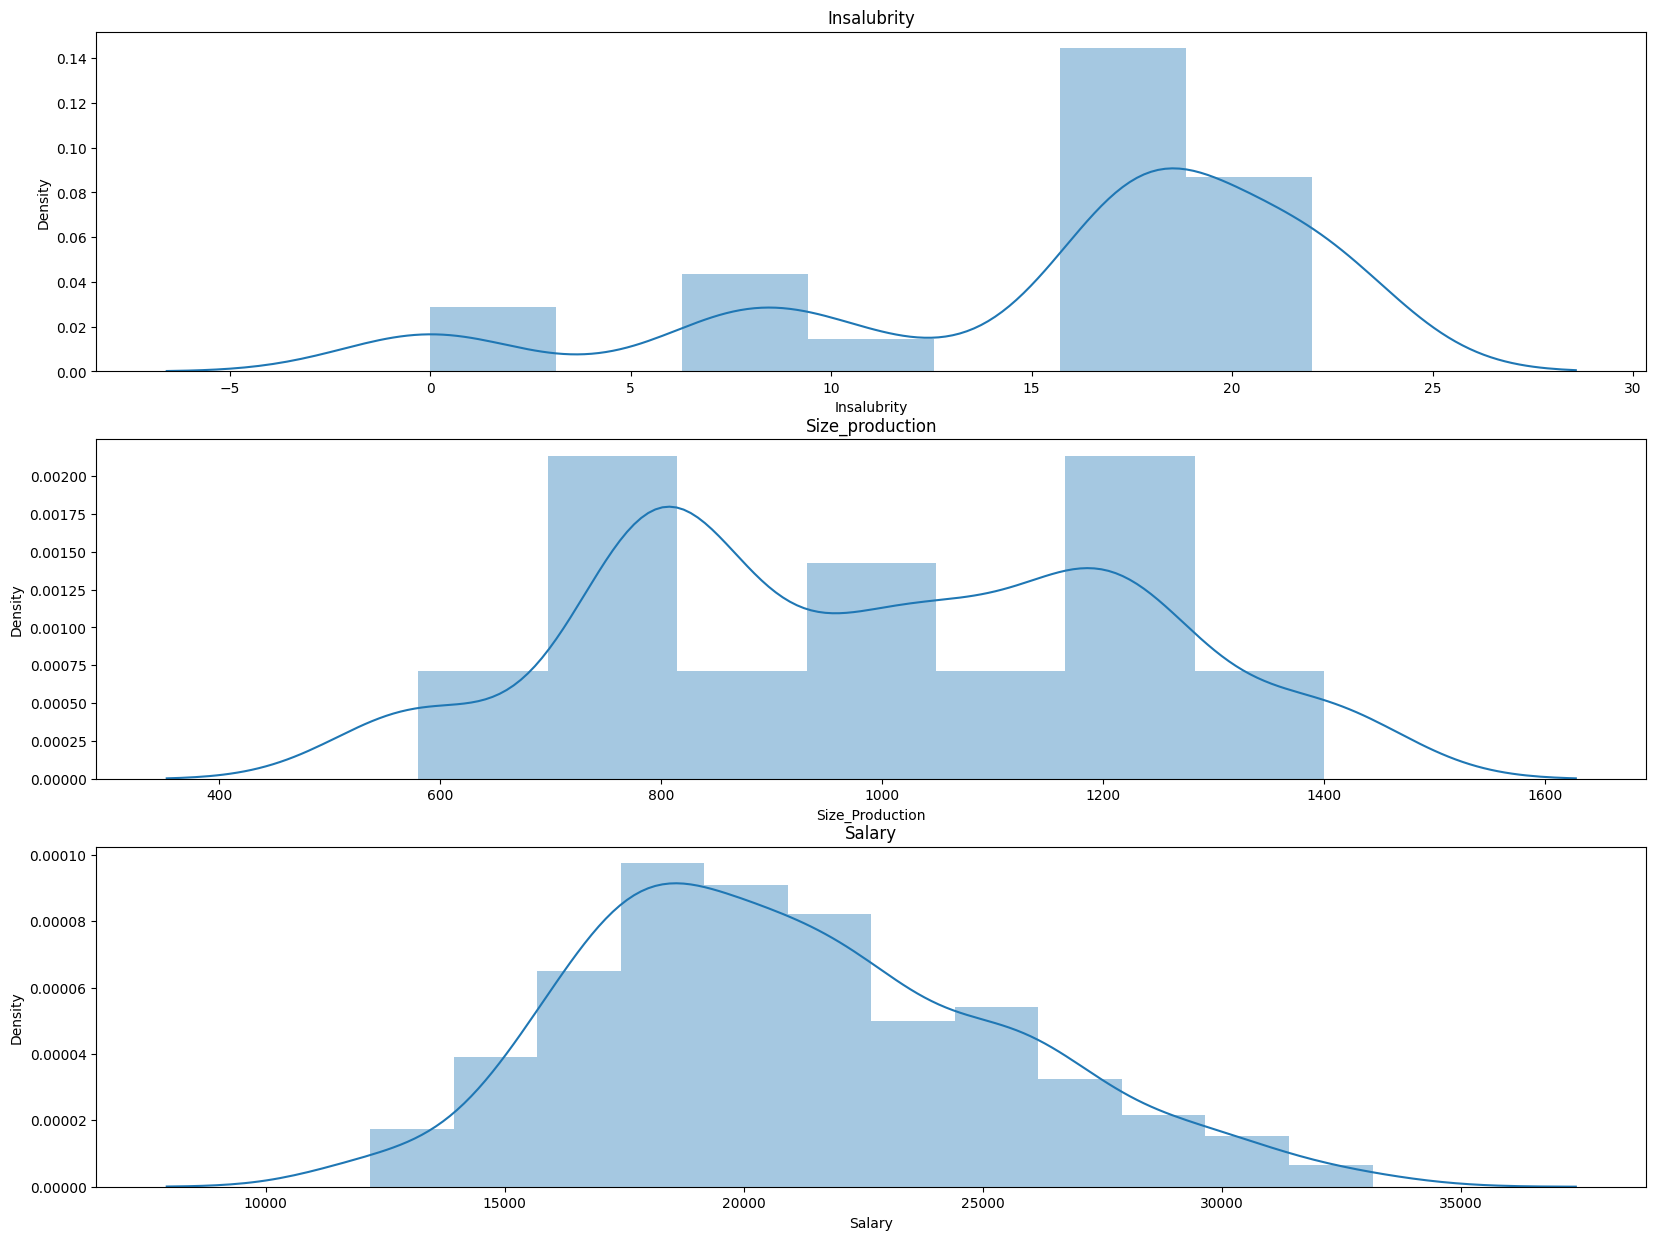

In [ ]:
#frequency Distribution
import matplotlib.pyplot as plt
import seaborn as sns
# import warnings

# warnings.filterwarnings("ignore", category=FutureWarning)

fig, axes = plt.subplots(3,1, figsize=(20,15))


plt.subplot(3,1,1)
sns.distplot(factory['Insalubrity'])
plt.title("Insalubrity")

plt.subplot(3,1,2)
sns.distplot(factory['Size_Production'])
plt.title("Size_production")

plt.subplot(3,1,3)
sns.distplot(factory['Salary'])
plt.title("Salary")


Text(0.5, 1.0, 'Salary')

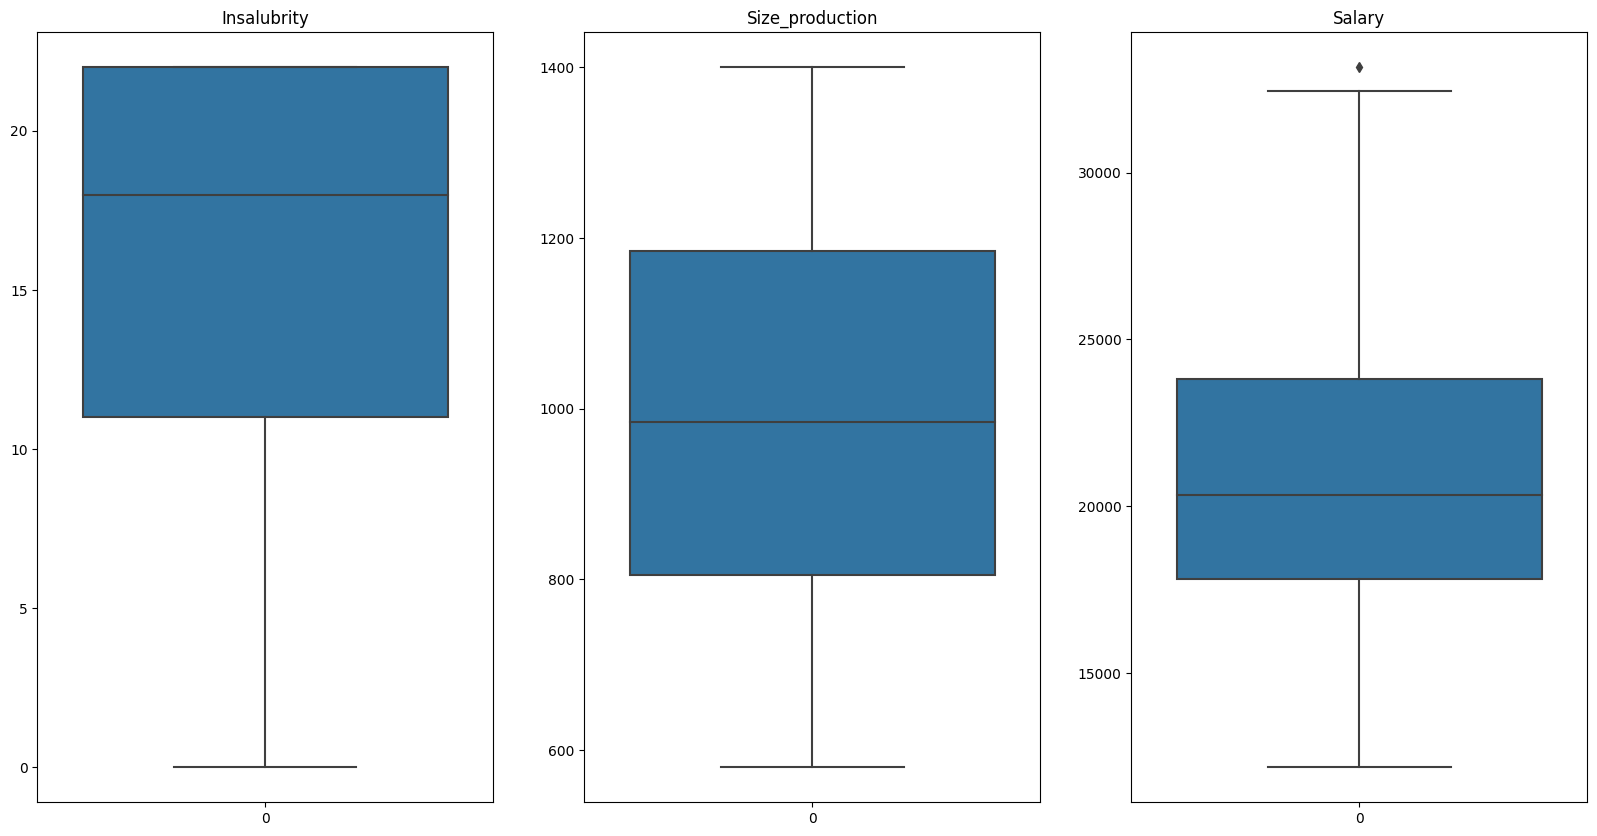

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(20,10))


plt.subplot(1,3,1)
sns.boxplot(factory['Insalubrity'])
plt.title("Insalubrity")

plt.subplot(1,3,2)
sns.boxplot(factory['Size_Production'])
plt.title("Size_production")

plt.subplot(1,3,3)
sns.boxplot(factory['Salary'])
plt.title("Salary")

<Axes: >

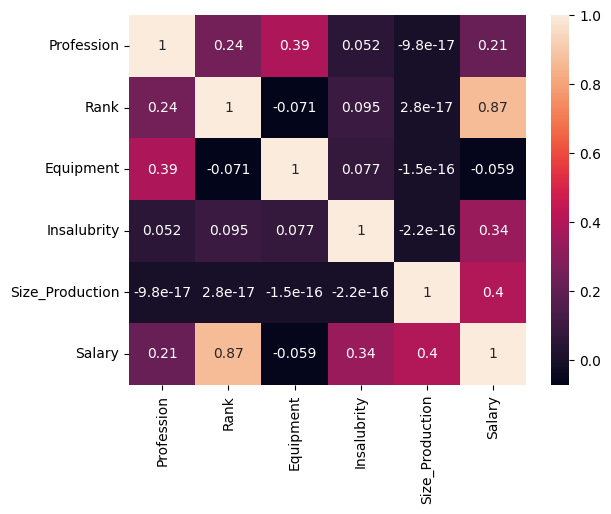

In [ ]:
sns.heatmap(factory.corr(), annot=True)

In [ ]:
X = factory.drop(['Salary'], axis=1)  #independent columns
y = factory['Salary'] #dependent column

Recursive Feature Elimination (RFE) is a feature selection technique that aims to identify the most relevant features in a dataset. It works by recursively eliminating less important features until a specified number of features or a predefined criteria is met. RFE is a powerful tool for reducing the dimensionality of a dataset and improving the performance of machine learning models.

Here's how RFE works in detail:

Select an Estimator: The first step is to choose an estimator or a model that will be used to evaluate the importance of features. This estimator can be any machine learning algorithm capable of assigning importance scores to features. In your case, you have chosen the DecisionTreeRegressor as the estimator.

Specify the Number of Features: Determine the number of features to select, which is passed to the n_features_to_select parameter of the RFE constructor. This parameter determines the desired number of features to be included in the final subset.

Initial Training: The RFE process starts by training the chosen estimator on the entire set of features in the dataset.

Feature Ranking: After the initial training, the importance or ranking of each feature is calculated. The importance scores depend on the specific algorithm used as the estimator. For example, in the case of the DecisionTreeRegressor, features are ranked based on their contribution to reducing the regression error.

Feature Elimination: The feature(s) with the lowest importance score(s) are eliminated from the dataset. The exact number of features eliminated at each iteration depends on the desired number of features to select. In your case, the algorithm will eliminate the features until only three features remain.

Recursive Iteration: The process of training the estimator, ranking features, and eliminating the least important features is repeated iteratively until the specified number of features is reached. Each iteration involves training the estimator on the reduced set of features from the previous iteration.

Final Subset of Features: Once the desired number of features is obtained, the RFE process stops, and the remaining features form the final subset. These selected features are considered the most relevant or important for the given task.

Model Training: Finally, the selected subset of features can be used to train a model for prediction or further analysis. By focusing on the most informative features, RFE can potentially improve model performance, reduce overfitting, and increase interpretability.

RFE is a powerful feature selection technique because it considers the interactions and dependencies among features by recursively evaluating their importance. It can be applied with different estimators and helps in identifying a compact set of features that are most informative for the given task.

In [ ]:
#Recursive Feature Selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, StratifiedKFold

rfe = RFE(DecisionTreeRegressor())

In [ ]:
rfe.fit(X, y)

RFE(estimator=DecisionTreeRegressor())

In [ ]:
factory.columns

Index(['Profession', 'Rank', 'Equipment', 'Insalubrity', 'Size_Production',
       'Salary'],
      dtype='object')

In [ ]:
#it will give you rankings of features
rfe.ranking_

array([4, 1, 3, 2, 1])

In [ ]:
feature_selected = X.columns[rfe.get_support()]
feature_selected

Index(['Rank', 'Size_Production'], dtype='object')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
X_train = rfe.transform(X_train)
X_test = rfe.transform(X_test)

In [ ]:
X_train.shape

(184, 2)

In [ ]:
model = DecisionTreeRegressor()

In [ ]:
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
pred = model.predict(X_test)

In [ ]:
#evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
#mean squared error
mse = mean_squared_error(y_test, pred)
print(mse)

2526977.812499999


In [ ]:
#mean absolute error
mae = mean_absolute_error(y_test, pred)
print(mae)

1278.6374999999998


In [ ]:
#r2 score
r2 = r2_score(y_test, pred)
print(r2)

0.8942751609306009


In [ ]:
from sklearn import tree

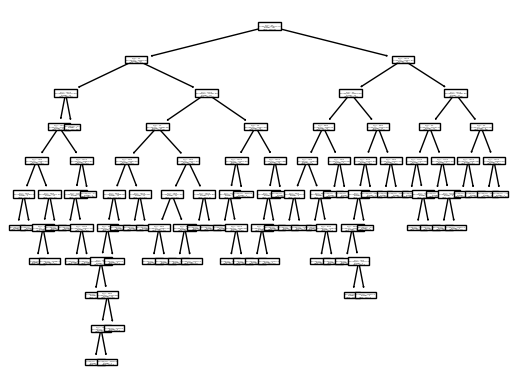

In [ ]:
tree.plot_tree(model)
plt.show()